In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/dataset/pima-indians-diabetes.csv'

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/dataset/pima-indians-diabetes.csv', 
                 names=["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [35]:
# 탐색적 데이터분석(EDA)

print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [37]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


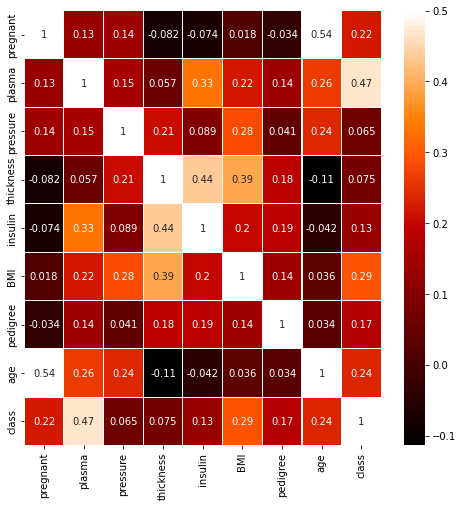

In [39]:
colormap = plt.cm.gist_heat # 그래프 색상 구성 지정
plt.figure(figsize = (8,8))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [40]:
df[['plasma','class']]

,plasma,class
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [41]:
df['plasma'].mean()  # plasma : 공복 혈당 농도

120.89453125

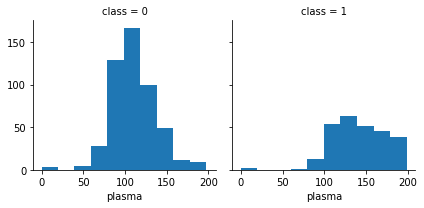

In [42]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [44]:
# 실행할 때마다 같은 결과 출력하기 위해 설정해주기
np.random.seed(42)          # numpy의 random 함수의 테이블 값 지정
tf.random.set_seed(42)      # set_seed로 지정된 난수 값 사용

In [45]:
np.loadtxt(my_data, delimiter=',')

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [46]:
dataset = np.loadtxt(my_data, delimiter=',')
x = dataset[:, :-1]
y = dataset[:, -1]

In [47]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [48]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [49]:
# 모델 설정(은닉층 2개, 출력층 1개) 

model = Sequential()
model.add(Dense(12,input_dim=8, activation = 'relu'))   # 입력값 8개 설정, 활성화함수 'relu' 사용
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))               # 이진분류(1,0) >> 활성화함수 sigmoid 사용

In [55]:
# 모델 컴파일 (환경설정)

model.compile(loss='binary_crossentropy',    # 오차함수 : 이진 교차 엔트로피
               optimizer='adam',            # 최적화함수 : adam
               metrics=['accuracy'])         # 측정 : 정확도

In [56]:
# 모델 실행

model.fit(x,y, epochs=200, batch_size=10)
# 실행 : fit / epochs : 반복횟수, batch_size : 배치단위 10개 묶어서 실행

Epoch 1/200
77/77 [==============================] - 4s 4ms/step - loss: 2.6924 - accuracy: 0.4896
Epoch 2/200
77/77 [==============================] - 0s 4ms/step - loss: 1.2286 - accuracy: 0.5703
Epoch 3/200
77/77 [==============================] - 0s 4ms/step - loss: 1.1255 - accuracy: 0.6211
Epoch 4/200
77/77 [==============================] - 0s 4ms/step - loss: 1.0235 - accuracy: 0.5990
Epoch 5/200
77/77 [==============================] - 0s 4ms/step - loss: 0.9394 - accuracy: 0.6120
Epoch 6/200
77/77 [==============================] - 0s 4ms/step - loss: 0.9052 - accuracy: 0.6224
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.8626 - accuracy: 0.6380
Epoch 8/200
77/77 [==============================] - 0s 4ms/step - loss: 0.8055 - accuracy: 0.6276
Epoch 9/200
77/77 [==============================] - 0s 4ms/step - loss: 0.8058 - accuracy: 0.6094
Epoch 10/200
77/77 [==============================] - 0s 4ms/step - loss: 0.7795 - accuracy: 0.6406
Epoch 11/

In [57]:
# 결과 출력

print('\n Accuracy : %.4f'%(model.evaluate(x,y)[1]))

24/24 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7917

 Accuracy : 0.7917


In [58]:
model.evaluate(x,y)

24/24 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7917


[0.4551438093185425, 0.7916666865348816]

In [59]:
model.evaluate(x,y)[1]

24/24 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.7917


0.7916666865348816